# Types of Clustering Algorithms

* So far we have done Regression and Classification. If you remember correctly, data set(s) we used in each of those models already had the target labels (or Values). So those type of problems are commonly known as __Supervised Learning__ Problems. What that means is model can find pattern in features and map that pattern to target value or (label), and use that knowledge to predict a future value. But what if there were no lables.

* So clustering is type of classification since we have to do is guess a label. But this is __Unsupervised Learning__ because in the data set we don't have a target labels. 

* It is our task to identify the different clusters(groups) and label them.

In this Notebook we will be taliking about 2 clustering algorithms. Those are as follows,
   1. K-Means Clustering
   2. Hierarchical Clustering

## 1. K-Means Clustering

In this model(algorithm) `K = Number of clusters`, and randomly random K points are selected withing the dataset (it dowes not have to be a data point) and by calculating euclidean distance closet points are assigned to each cluster. Steps are as follows,

<img src="images/KM_1.png"/>

__Following shows how the process is done__

<img src="images/KM_2.png"/>
<img src="images/KM_3.png"/>
<img src="images/KM_4.png"/>
<img src="images/KM_5.png"/>
<img src="images/KM_6.png"/>
<img src="images/KM_7.png"/>
<img src="images/KM_8.png"/>
<img src="images/KM_9.png"/>
<img src="images/KM_10.png"/>
<img src="images/KM_11.png"/>
<img src="images/KM_12.png"/>
<img src="images/KM_13.png"/>
<img src="images/KM_14.png"/>
<img src="images/KM_15.png"/>

<img src="images/KM_16.png"/>

In [1]:
# Lets implemet this using python

# first lets import the modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a random seed
np.random.seed(42)

In [2]:
# Importing the dataset
data = pd.read_csv('data/KMeans Clustering/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# lets explore this dataset

# see some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# has 200 datapoints
# one object data type (we might have to convert it to numerical)

# lets see some other details
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
# see if there is any missing data
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# seems like no missing values

# Lets divide our data into features we want to use for clustering
# in this we will be using 'Annual Income (k$)' & 'Spending Score (1-100)'
X = data[['Annual Income (k$)','Spending Score (1-100)' ]]
X.to_csv('data/X.csv',index=False)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


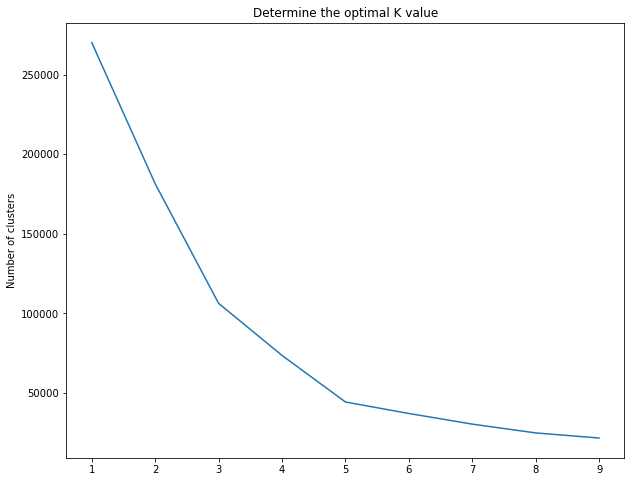

In [7]:
# no feture scaling is needed since there is not much scaling different

# import the model
from sklearn.cluster import KMeans

# so we have to identify the optimum number of clusters, we can do this by running this algorithm in a loop and ploting
# the WCSS(Within Cluster Sum of Squared) also known as sum of squred distances between each point and centroid

# What is the maximum number of clusters we can have = 200 (Since there are 200 points)
# then WCSS will be 0
# so what happen is when the number of clusters get increased WCSS keep getting reduced. but he have to find
# the optimum one using 'Elbow method'

wcss =[]
K_values = range(1,10)

# # we have to pick 'K-means ++' as init to avoid 'Random centroid trap' (default here)
for i in K_values:
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)

# Now we can plot this and see
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(K_values,wcss)
ax.set_title('Determine the optimal K value')
ax.set_ylabel('WCSS')
ax.set_ylabel('Number of clusters')
ax.plot();

In [43]:
# Okay we can see that the optimal number of clusters is 5.
# after five there is no significant change

model = KMeans(n_clusters=5)

In [44]:
model.fit(X)
labels = model.fit_predict(X)

# if we have done right, labels array should have 200 items
len(labels)

200

In [45]:
# get centroids
centroids = model.cluster_centers_

In [46]:
X_new = pd.read_csv('data/X.csv')
X_new.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [47]:
X_new['Label'] = labels
X_new.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


In [48]:
X_new.loc[X_new['Label']==0,'Annual Income (k$)']

0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24    28
26    28
28    29
30    30
32    33
34    33
36    34
38    37
40    38
42    39
44    39
Name: Annual Income (k$), dtype: int64

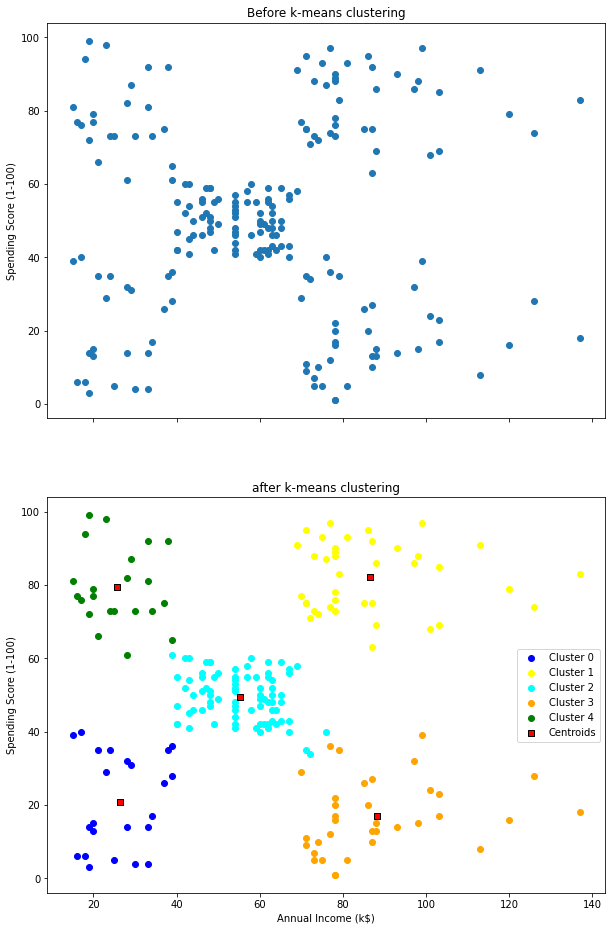

In [49]:
# Nice

# Since this is only 2 dimensions we can plot and see
# if more than 2 dimensions we can't

fig, ((ax1),(ax2)) = plt.subplots(figsize=(10,16),nrows=2,sharex=True)

ax1.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
#ax2.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=labels)
ax2.scatter(X_new.loc[X_new['Label']==0,'Annual Income (k$)'],X_new.loc[X_new['Label']==0,'Spending Score (1-100)'],color='blue',label='Cluster 0')
ax2.scatter(X_new.loc[X_new['Label']==1,'Annual Income (k$)'],X_new.loc[X_new['Label']==1,'Spending Score (1-100)'],color='yellow',label='Cluster 1')
ax2.scatter(X_new.loc[X_new['Label']==2,'Annual Income (k$)'],X_new.loc[X_new['Label']==2,'Spending Score (1-100)'],color='cyan',label='Cluster 2')
ax2.scatter(X_new.loc[X_new['Label']==3,'Annual Income (k$)'],X_new.loc[X_new['Label']==3,'Spending Score (1-100)'],color='orange',label='Cluster 3')
ax2.scatter(X_new.loc[X_new['Label']==4,'Annual Income (k$)'],X_new.loc[X_new['Label']==4,'Spending Score (1-100)'],color='green',label='Cluster 4')
            
ax2.scatter(centroids[:,0],centroids[:,1],color='red',label='Centroids',marker='s',edgecolors='black')

ax2.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax2.set_ylabel('Spending Score (1-100)')
ax1.set_title('Before k-means clustering')
ax2.set_title('after k-means clustering')
ax2.legend();

## 2. Hierarchical Clustering

There are mainly two types of Hierarchical clustering,
   1. Agglomerative ( Bottom up approach )
   2. Divisive (Top Down Approach )
   
We will be mainly talking about __Agglomerative ( Bottom up approach )__. So the intution is like this,

> First, we start from our dataset and we will mark each of them as their own cluster and we will look for the closest clusters and make them one cluster. And repeat this process until theres only one cluster remain. There are many ways we can define the closeness of cluster like,
    >
        * Distance between closet points in two clusters
        * Distance between farthest points in two clusters
        * Distance between cluster centroids
For easiness lets say we go with the last one 

* So the steps are as follows,

<img src="images/HC_1.png"/>
<img src="images/HC_2.png"/>
<img src="images/HC_3.png"/>
<img src="images/HC_3.1.png"/>
<img src="images/HC_4.png"/>
<img src="images/HC_5.png"/>
<img src="images/HC_6.png"/>
<img src="images/HC_7.png"/>

* So if this is what is happening, how are we going to decide the optimum number of clusters.
* That's where the dendrogram comes in

> Dendrogram keeps track of cluster history and by height it represent eucledian distances between clusters, in other words. its shows how dissimilar two culsters were.

> So what we do is we find the longest line that does not cut any horizontal lines and set a euclidian distance(horzontal line) as a threshold, So the number of vertical lines that threshold line cut is the number of optimum clusters


<img src="images/HC_8.png"/>

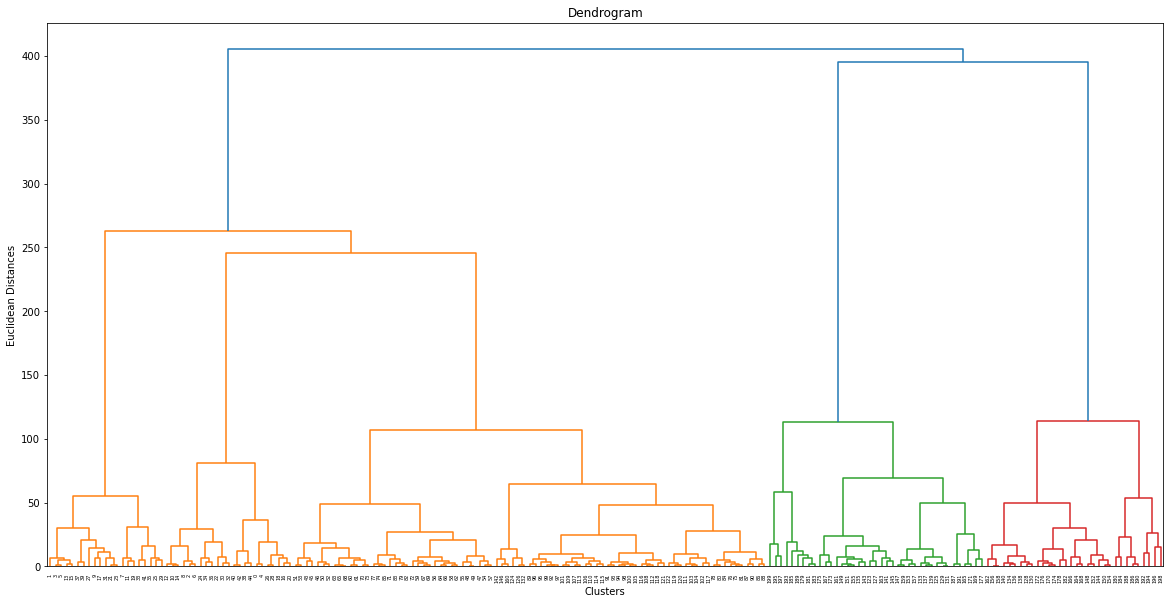

In [50]:
# Now lets try this

# importing all the modules need
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn

# setting a random seed globally
np.random.seed(42)

# import the dataset 
X = pd.read_csv('data/X.csv') # X.csv is one i created earlier with only relevant features.. saves us the extra trouble

# now we need to decide the number of clusters
# for k-means we use elbow method

# here we will use a dendogram
import scipy.cluster.hierarchy as sch

fig, ax = plt.subplots(figsize=(20,10))
dndgrm = sch.dendrogram(ax=ax,Z=sch.linkage(y=X,method='ward',metric='euclidean'))
ax.set_title('Dendrogram')
ax.set_xlabel('Clusters')
ax.set_ylabel('Euclidean Distances');


In [51]:
# By obsersing this we can deside the optimum number of clusters is 5
# and byther way only for 2D data this dendrogram can be plot

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5)
model.fit(X)

#get cluster labels
labels = model.labels_

# Preparing new X to plotting purposes
X_new_2 = pd.read_csv('data/X.csv')
X_new_2['Label'] = labels
X_new_2.loc[X_new['Label']==0,'Annual Income (k$)']

0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24    28
26    28
28    29
30    30
32    33
34    33
36    34
38    37
40    38
42    39
44    39
Name: Annual Income (k$), dtype: int64

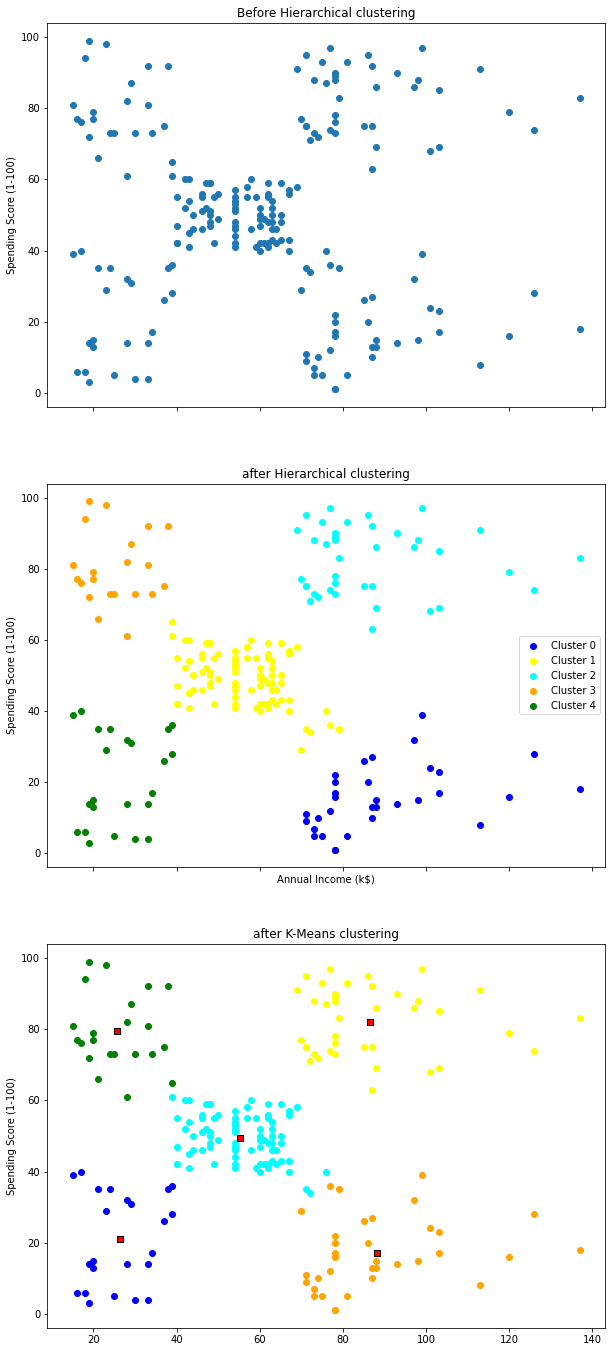

In [52]:
# Now we can plot
# Since this is only 2 dimensions we can plot and see
# if more than 2 dimensions we can't

fig, ((ax3),(ax4),(ax2)) = plt.subplots(figsize=(10,24),nrows=3,sharex=True)

ax3.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
#ax2.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=labels)
ax4.scatter(X_new_2.loc[X_new_2['Label']==0,'Annual Income (k$)'],X_new_2.loc[X_new_2['Label']==0,'Spending Score (1-100)'],color='blue',label='Cluster 0')
ax4.scatter(X_new_2.loc[X_new_2['Label']==1,'Annual Income (k$)'],X_new_2.loc[X_new_2['Label']==1,'Spending Score (1-100)'],color='yellow',label='Cluster 1')
ax4.scatter(X_new_2.loc[X_new_2['Label']==2,'Annual Income (k$)'],X_new_2.loc[X_new_2['Label']==2,'Spending Score (1-100)'],color='cyan',label='Cluster 2')
ax4.scatter(X_new_2.loc[X_new_2['Label']==3,'Annual Income (k$)'],X_new_2.loc[X_new_2['Label']==3,'Spending Score (1-100)'],color='orange',label='Cluster 3')
ax4.scatter(X_new_2.loc[X_new_2['Label']==4,'Annual Income (k$)'],X_new_2.loc[X_new_2['Label']==4,'Spending Score (1-100)'],color='green',label='Cluster 4')
# K-Means clusters
ax2.scatter(X_new.loc[X_new['Label']==0,'Annual Income (k$)'],X_new.loc[X_new['Label']==0,'Spending Score (1-100)'],color='blue',label='Cluster 0')
ax2.scatter(X_new.loc[X_new['Label']==1,'Annual Income (k$)'],X_new.loc[X_new['Label']==1,'Spending Score (1-100)'],color='yellow',label='Cluster 1')
ax2.scatter(X_new.loc[X_new['Label']==2,'Annual Income (k$)'],X_new.loc[X_new['Label']==2,'Spending Score (1-100)'],color='cyan',label='Cluster 2')
ax2.scatter(X_new.loc[X_new['Label']==3,'Annual Income (k$)'],X_new.loc[X_new['Label']==3,'Spending Score (1-100)'],color='orange',label='Cluster 3')
ax2.scatter(X_new.loc[X_new['Label']==4,'Annual Income (k$)'],X_new.loc[X_new['Label']==4,'Spending Score (1-100)'],color='green',label='Cluster 4')
            
ax2.scatter(centroids[:,0],centroids[:,1],color='red',label='Centroids',marker='s',edgecolors='black')


ax4.set_xlabel('Annual Income (k$)')
ax3.set_ylabel('Spending Score (1-100)')
ax4.set_ylabel('Spending Score (1-100)')
ax2.set_ylabel('Spending Score (1-100)')
ax3.set_title('Before Hierarchical clustering')
ax4.set_title('after Hierarchical clustering')
ax2.set_title('after K-Means clustering')
ax4.legend();

In [ ]:
# seems like there are are some mismatches